## Hausaufgabe 6

### Abgage via studip bis spätestens 03.07. 12:00 Uhr (zur VL)! 
### Verteidigung 06.07. 08:00-11:00 Uhr (Timeslots werden vorher bekannt gegeben)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Geben Sie eine Lösung pro Gruppe ab und packen Sie Ihre Lösung in eine Zip-Datei mit dem Namen und Matrikelnummer eines Mitglieds. Also z.B. `mustermann_12345678.zip` 

In [62]:
%%bash
pip install pandas numpy matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## Aufgabe 1 (10%)

#### 1. (10%) Laden Sie das Titanic Dataset als Pandas DataFrame. Beantworten Sie folgende Fragen, indem Sie den Pandas Dataframe mit geeigneten Funktionen und Transformationen bearbeiten:

In [63]:
import pandas as pd
URL_CSV = "./titanic.csv" #Das ist ein kommentar
df = pd.read_csv(URL_CSV) 

a) (5%) Was ist der durchschnittliche Ticketpreis pro Klasse?

In [64]:
average_ticket_price = df.groupby('pclass')['fare'].mean()
print(average_ticket_price.round(2))

pclass
1    84.15
2    20.66
3    13.68
Name: fare, dtype: float64


b) (5%) Welche Ticket Klasse hat eine höhere Überlebensrate?

In [65]:
class_survival_rates = df.groupby('pclass')['survived'].mean()
max_survival_rate = class_survival_rates.idxmax()
print("Die folgende Klasse hat die beste überlebensrate:", max_survival_rate)

Die folgende Klasse hat die beste überlebensrate: 1


---

## Aufgabe 2 (40%)

#### 1. (3%) Definieren Sie mit dem package "scipy" eine Gaussverteilung mit Mittelwert 10 and Standardabweichung 3 

In [79]:
from scipy.stats import norm

mean = 10
std_dev = 3

gaussian_distribution = norm(loc=mean, scale=std_dev)
print(gaussian_distribution.pdf(mean))

0.1329807601338109


#### 2. (10%) Ziehen Sie aus dieser Verteilung n = [100, 1000, 10000] Stichproben, und plotten Sie diese Stichproben-Verteilungen als Histogramme in einer 3-teiligen Figure. Plotten Sie dann auf die Histogramme die PDF der Verteilung. 

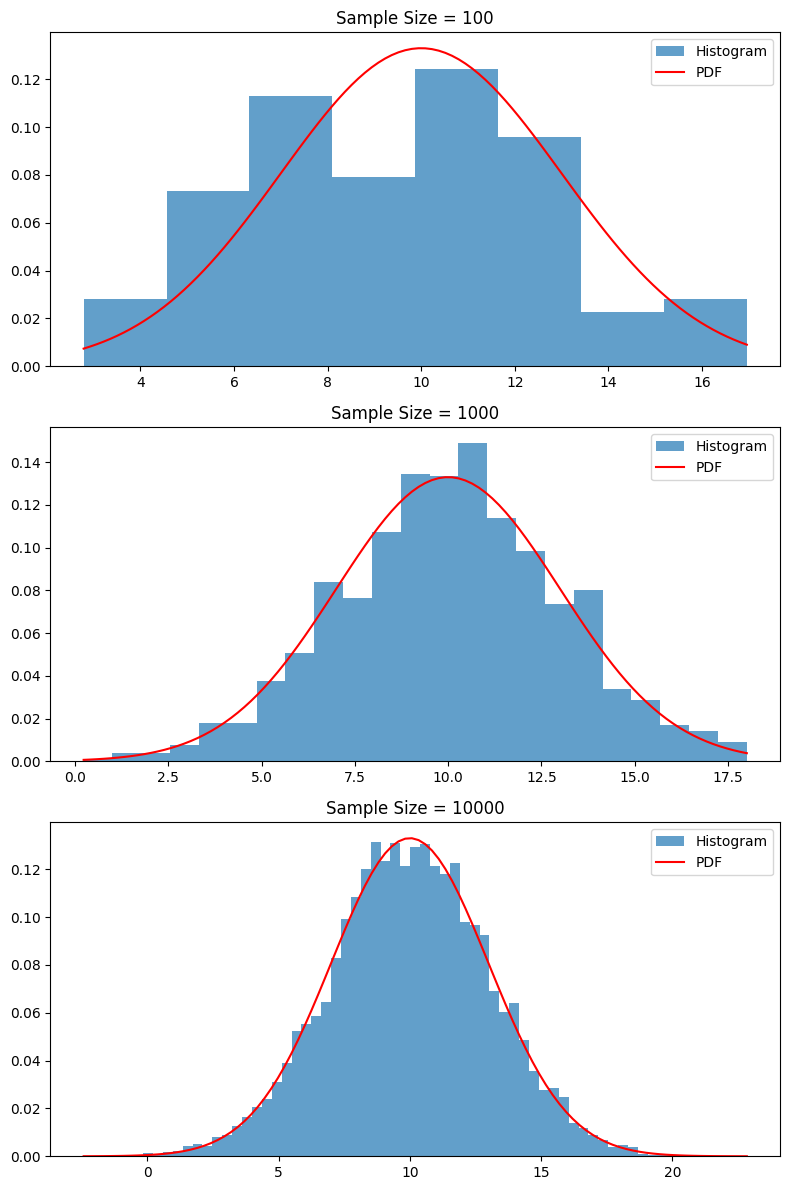

In [81]:
import numpy as np
import matplotlib.pyplot as plt

sample_sizes = [100, 1000, 10000]

# Erstellen einer 3-teiligen Figure
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i, sample_size in enumerate(sample_sizes):
    # Ziehen von Stichproben aus der Verteilung
    samples = gaussian_distribution.rvs(size=sample_size)
    
    # Histogramm der Stichproben
    axs[i].hist(samples, bins='auto', density=True, alpha=0.7, label='Histogram')
    
    # PDF der Verteilung
    x = np.linspace(samples.min(), samples.max(), 100)
    y = gaussian_distribution.pdf(x)
    axs[i].plot(x, y, 'r', label='PDF')
    
    axs[i].set_title(f'Sample Size = {sample_size}')
    axs[i].legend()

plt.tight_layout()
plt.show()

#### 3. (2%) Was ist der Unterschied zwischen der Standardabweichung (STD) der Stichprobenverteilung und der STD der zugrundeliegenden Gaussverteilung? Stimmt das mit Ihren empirischen Ergebnissen überein?

Die Standardabweichung (STD) der Stichprobenverteilung gibt an, wie stark die Werte der Stichprobe um den Mittelwert der Stichprobe variieren. Dagegen gibt die Gaußverteilung die Variation aller möglicher Zufallswerte um den Mittelwert der Gesamtverteilung an. 
Die STD der Stichprobenverteilung nähert sich der Gaußverteilung immmer weiter an, je mehr Stichproben verwendet werden. 

In den hier erarbeiteten Ergebnissen in Form der ist deutlich zu beachten, dass die Abweichung zwischen den Stichproben und der Gaußverteilung, dargestellt durch blaue Säulen und einen roten Funktionsgraphen, immmer kleiner wird (sprich: Die freien Flächen unterhalb der Funktionsgraphen werden kleiner, die blauen Säulen ragen weniger deutlich über), je mehr Stichproben verwendet werden.

#### 4. (10%) Laden Sie den numpy array `sample.npy`. Berechnen Sie das 95% Konfidenzintervall für den Mittelwert via Bootstrapping und vergleichen Sie ihn mit dem theoretischen Wert.

In [68]:
import numpy as np

# Laden des numpy-Arrays aus der Datei
data = np.load('sample.npy')

# Berechnung des theoretischen Werts
mean = np.mean(data)
std_dev = np.std(data)
n = len(data)
z_score = 1.96  # Für ein 95% Konfidenzniveau (z-Wert für 95% Konfidenzintervall)
theoretical_lower = mean - (z_score * std_dev / np.sqrt(n))
theoretical_upper = mean + (z_score * std_dev / np.sqrt(n))

# Bootstrapping
bootstrap_iterations = 1000
bootstrap_means = []

for _ in range(bootstrap_iterations):
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Berechnung des Bootstrapping-Konfidenzintervalls
bootstrap_lower = np.percentile(bootstrap_means, 2.5)
bootstrap_upper = np.percentile(bootstrap_means, 97.5)

# Ausgabe der Ergebnisse
print("Theoretisches 95% Konfidenzintervall:")
print(f"Untere Grenze: {theoretical_lower}")
print(f"Obere Grenze: {theoretical_upper}")

print("\nBootstrapping 95% Konfidenzintervall:")
print(f"Untere Grenze: {bootstrap_lower}")
print(f"Obere Grenze: {bootstrap_upper}")


Theoretisches 95% Konfidenzintervall:
Untere Grenze: 4.9487559304890425
Obere Grenze: 6.068736053125949

Bootstrapping 95% Konfidenzintervall:
Untere Grenze: 4.972911231070925
Obere Grenze: 6.051272350628306


#### 5. (15%) Die Null Hypothese ist nun, dass der Mittelwert gleich 5 ist. Die Alternative Hypothese ist, dass er ungleich 5 ist. Würden Sie die Null Hypothese verwerfen? Nutzen Sie Bootstrapping.

In [69]:
import numpy as np

# Laden des numpy-Arrays aus der Datei
data = np.load('sample.npy')

# Berechnung des beobachteten Mittelwerts
observed_mean = np.mean(data)

# Nullhypothese: Mittelwert = 5
null_hypothesis_mean = 5

# Bootstrapping
bootstrap_iterations = 1000
bootstrap_means = []

for _ in range(bootstrap_iterations):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Berechnung des Bootstrapping-Konfidenzintervalls
bootstrap_lower = np.percentile(bootstrap_means, 2.5)
bootstrap_upper = np.percentile(bootstrap_means, 97.5)

# Überprüfung der Nullhypothese
if null_hypothesis_mean >= bootstrap_lower and null_hypothesis_mean <= bootstrap_upper:
    print("Die Nullhypothese kann nicht verworfen werden.")
else:
    print("Die Nullhypothese wird verworfen.")

# Ausgabe der Ergebnisse
print("Beobachteter Mittelwert:", observed_mean)
print("Bootstrapping-Konfidenzintervall:")
print(f"Untere Grenze: {bootstrap_lower}")
print(f"Obere Grenze: {bootstrap_upper}")


Die Nullhypothese kann nicht verworfen werden.
Beobachteter Mittelwert: 5.508745991807496
Bootstrapping-Konfidenzintervall:
Untere Grenze: 4.976695330773993
Obere Grenze: 6.092604347245024


## Aufgabe 3 (50%)

#### Wir wollen wissen, ob die Gruppen in diesem Tutorat gleich viel Zeit benötigen, um die Hausaufgaben zu lösen. Dazu wir haben wir von 2 der Gruppen die Zeiten über das Semester hinweg gemessen: 

gruppe1 = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]\
gruppe2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

Nutzen Sie in dieser Aufgabe ein Signifikanzniveau von 0.05. Sie können alle Hypothesentests mit Hilfe von Scipy durchführen. 

#### 1. (5%) Was ist H0 und H1? Sind die Gruppen unabhängig oder abhängig (paired vs. unpaired)

In [70]:
import numpy as np
from scipy.stats import ttest_ind

gruppe1 = [6.2, 7.1, 1.5, 2.3, 2.0, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
gruppe2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2, 3.4]

# Null Hypothesis (H0): The mean times for homework completion in the two groups are equal.
H0 = "The mean times for homework completion in the two groups are equal."

# Alternative Hypothesis (H1): The mean times for homework completion in the two groups are not equal.
H1 = "The mean times for homework completion in the two groups are not equal."

# Perform unpaired t-test (independent samples t-test)
t_statistic, p_value = ttest_ind(gruppe1, gruppe2)

# Significance level (alpha)
alpha = 0.05

# Check if null hypothesis should be rejected or not
if p_value < alpha:
    result = "Reject the null hypothesis."
else:
    result = "Fail to reject the null hypothesis."

# Print the results
print("Null Hypothesis (H0):", H0)
print("Alternative Hypothesis (H1):", H1)
print("Groups are unpaired.")
print("p-value:", p_value)
print("Result:", result)


Null Hypothesis (H0): The mean times for homework completion in the two groups are equal.
Alternative Hypothesis (H1): The mean times for homework completion in the two groups are not equal.
Groups are unpaired.
p-value: 0.5791311175217643
Result: Fail to reject the null hypothesis.


#### 2. (30%) Testen Sie die Daten auf folgende Annahmen. Nutzen Sie auch hierfür eigene geeignete Hypothesentests.

a) (15%) Die Datensätze beider Gruppen folgen einer Normalverteilung \
b) (15%) Die Datensätze beider Gruppen haben die gleiche STD (iid. data)

In [71]:
from scipy.stats import shapiro

# Gruppe 1
statistic1, p_value1 = shapiro(gruppe1)
print("Shapiro-Wilk Test - Gruppe 1:")
print("Statistic:", statistic1)
print("p-value:", p_value1)

# Gruppe 2
statistic2, p_value2 = shapiro(gruppe2)
print("Shapiro-Wilk Test - Gruppe 2:")
print("Statistic:", statistic2)
print("p-value:", p_value2)

Shapiro-Wilk Test - Gruppe 1:
Statistic: 0.8326535224914551
p-value: 0.007648023776710033
Shapiro-Wilk Test - Gruppe 2:
Statistic: 0.7527353167533875
p-value: 0.0004891105927526951


In [72]:
from scipy.stats import levene

# Levene-Test
statistic, p_value = levene(gruppe1, gruppe2)
print("Levene-Test:")
print("Statistic:", statistic)
print("p-value:", p_value)


Levene-Test:
Statistic: 0.5283763359785221
p-value: 0.47274412143222644


#### 3. (15%) Aufgrund der Ergebnise aus 1. und 2., welche Art von Hypothesentest brauchen Sie für diese Aufgabe? Führen Sie den Test durch.

In [73]:
from scipy.stats import ttest_ind

# Unpaired t-Test (independent samples t-test)
t_statistic, p_value = ttest_ind(gruppe1, gruppe2)

# Significance level (alpha)
alpha = 0.05

# Check if null hypothesis should be rejected or not
if p_value < alpha:
    result = "Reject the null hypothesis."
else:
    result = "Fail to reject the null hypothesis."

# Print the results
print("Unpaired t-Test:")
print("p-value:", p_value)
print("Result:", result)

Unpaired t-Test:
p-value: 0.5791311175217643
Result: Fail to reject the null hypothesis.


---